In [83]:
import networkx as nx
import pandas as pd
from pandas import DataFrame
from pandas import Series
from collections import OrderedDict
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


# Task A

In [2]:
sentiment = pd.read_csv("Assignment 3 Sentiment Scores.csv")
#sentiment = sentiment.fillna(0)

In [3]:
sentiment.head(2)

,ES,LS,RX,A8,A6,3series,5series,7series,XJ,Sclass
0,NaN,NaN,4,3,NaN,NaN,NaN,5,2,1
1,NaN,NaN,3,2,2,2,2,2,NaN,NaN


In [4]:
models = list(sentiment.columns)

In [5]:
for col1 in xrange(0,10):
    for col2 in xrange(col1,10):
        if col1 != col2:
            sentiment[models[col1] + '-' + models[col2]] = sentiment.ix[:,col1] - sentiment.ix[:,col2]

In [22]:
comparisons = sentiment.ix[:,10:]

In [10]:
edges = OrderedDict()
for col in comparisons:
    model_col = comparisons[col]
    edges[col] = model_col[model_col > 0].mean(), abs(model_col[model_col < 0].mean())

In [106]:
# Trying to remove NaN

#for index, c in enumerate(edges.items()):
#    for i in xrange(0,2):
#        if edges.items()[index][1][i] == float('nan'):
#             edges.items()[index][1][i] = 0

In [117]:
edges

OrderedDict([('ES-LS', (1.1666666666666667, 2.0)), ('ES-RX', (1.6666666666666667, 2.0)), ('ES-A8', (3.4, 3.0)), ('ES-A6', (6.0, 1.6666666666666667)), ('ES-3series', (3.25, 6.0)), ('ES-5series', (4.0, 5.0)), ('ES-7series', (3.6, 2.8)), ('ES-XJ', (1.0, 1.0)), ('ES-Sclass', (3.2857142857142856, 2.6153846153846154)), ('LS-RX', (3.4, 1.1428571428571428)), ('LS-A8', (2.857142857142857, 2.8378378378378377)), ('LS-A6', (3.3333333333333335, 1.2857142857142858)), ('LS-3series', (2.8, 4.0)), ('LS-5series', (2.7, 3.1)), ('LS-7series', (2.642857142857143, 2.75)), ('LS-XJ', (2.75, 2.888888888888889)), ('LS-Sclass', (2.554054054054054, 2.6774193548387095)), ('RX-A8', (2.2, 1.0)), ('RX-A6', (3.6666666666666665, nan)), ('RX-3series', (4.0, 4.0)), ('RX-5series', (3.6, nan)), ('RX-7series', (3.75, 1.0)), ('RX-XJ', (2.0, nan)), ('RX-Sclass', (3.6363636363636362, 2.5)), ('A8-A6', (1.375, 3.1666666666666665)), ('A8-3series', (3.25, 5.0)), ('A8-5series', (3.3333333333333335, 5.0)), ('A8-7series', (2.18181818

In [111]:
test = nx.DiGraph()
test.add_weighted_edges_from([('a','b',nan)])

In [13]:
PCN = nx.DiGraph()

In [23]:
for col1 in xrange(0,10):
    for col2 in xrange(col1,10):
        if col1 != col2:
            model1 = models[col1]
            model2 = models[col2]
            PCN.add_weighted_edges_from([(model1, model2, edges[model1 + '-' + model2][0]), (model2, model1, edges[model1 + '-' + model2][1])])

{'3series': <matplotlib.text.Text at 0x170da048>,
 '5series': <matplotlib.text.Text at 0x170da7b8>,
 '7series': <matplotlib.text.Text at 0x1707cd30>,
 'A6': <matplotlib.text.Text at 0x1708b898>,
 'A8': <matplotlib.text.Text at 0x1708bc50>,
 'ES': <matplotlib.text.Text at 0x170da400>,
 'LS': <matplotlib.text.Text at 0x1708b4e0>,
 'RX': <matplotlib.text.Text at 0x1708b128>,
 'Sclass': <matplotlib.text.Text at 0x1707c978>,
 'XJ': <matplotlib.text.Text at 0x1707c518>}

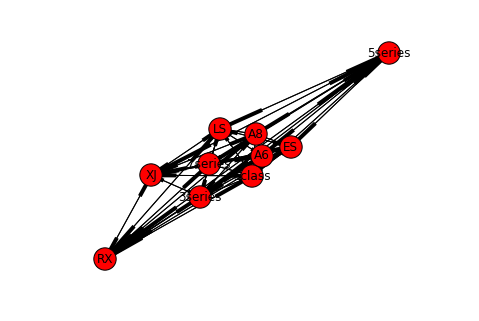

In [15]:
pos = nx.spring_layout(PCN)
nx.draw(PCN,pos,node_size=500)
nx.draw_networkx_labels(PCN,pos)

# Task B

In [16]:
page_rank = nx.pagerank(PCN, max_iter=1000, weight=None)

In [119]:
wpage_rank = nx.pagerank(PCN, max_iter=10000000, weight='weight')

NetworkXError: pagerank: power iteration failed to converge in 10000000 iterations.

In [191]:
sales = pd.read_csv("sales.csv")

In [220]:
sales = sales.sort(['Model'])

In [222]:
sales['page_rank'] = Series(page_rank.values())

In [223]:
sales['wpage_rank'] = Series(wpage_rank.values())

In [224]:
sales

,Model,Approximate # sold in the U.S.A. (2012+2013),page_rank,wpage_rank
2,3series,220000,0.1,0.102151
3,5series,60000,0.1,0.098045
4,7series,14000,0.1,0.101622
0,A6,20000,0.1,0.099377
1,A8,12000,0.1,0.097416
6,ES,135000,0.1,0.098564
7,LS,30000,0.1,0.100003
8,RX,120000,0.1,0.098144
9,Sclass,25000,0.1,0.101695
5,XJ,6600,0.1,0.102985


In [225]:
sales['Approximate # sold in the U.S.A. (2012+2013)'].corr(sales['page_rank'])

0.031456436245620042

In [226]:
sales['Approximate # sold in the U.S.A. (2012+2013)'].corr(sales['wpage_rank'])

-0.015167250377432903